In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 

In [2]:
train = pd.read_csv("train_ctrUa4K.csv")
test = pd.read_csv("test_lAUu6dG.csv")

train_original = train.copy()
test_original = test.copy()

In [3]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Univariate ANalysis

In [10]:
#TARGET  VARIABLE
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
#to print proportions
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

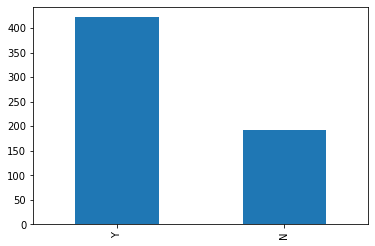

In [12]:
train['Loan_Status'].value_counts().plot.bar()

CAtegorical Variable Analysis

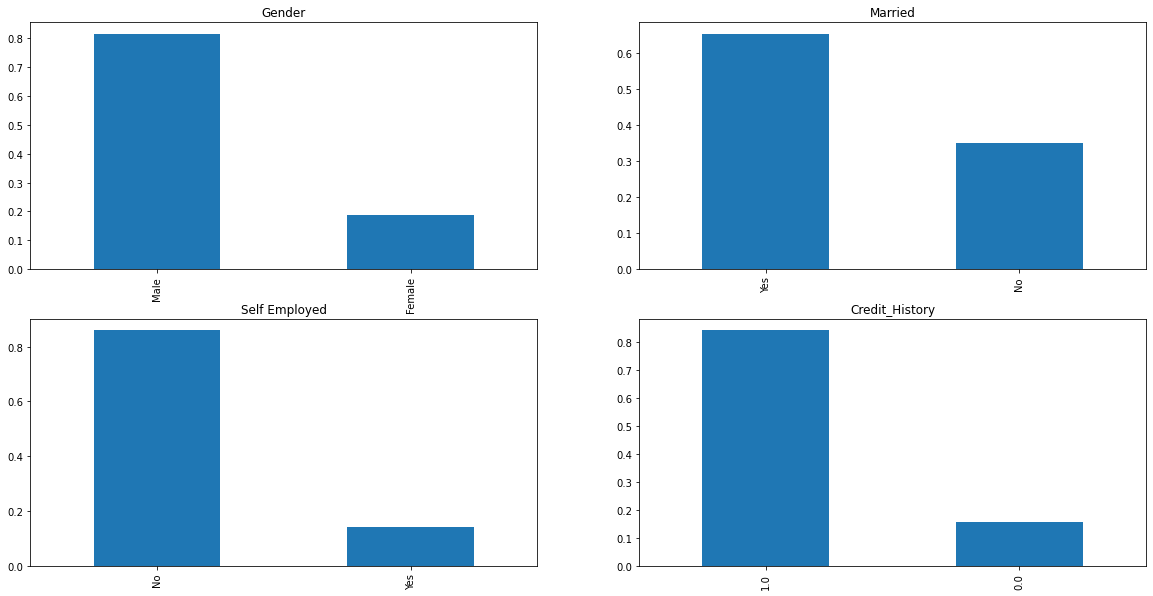

In [13]:
plt.figure(1)

plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize = (20,10), title="Gender")

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self Employed")

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit_History")

plt.show()

Ordinal Variables

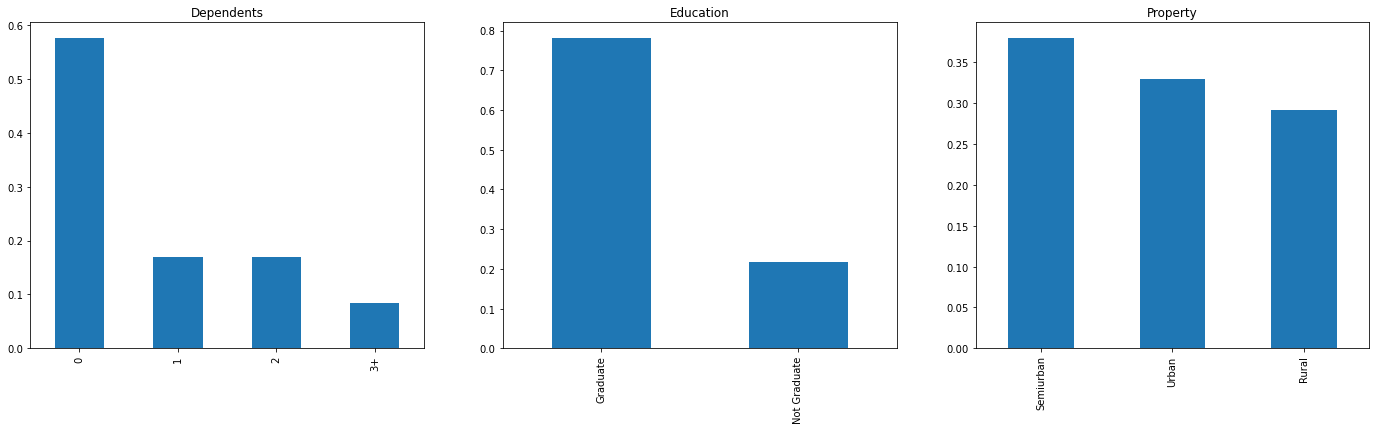

In [14]:
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize = (24,6), title="Dependents")

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title="Education")

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title="Property")

plt.show()

Numerical Variable

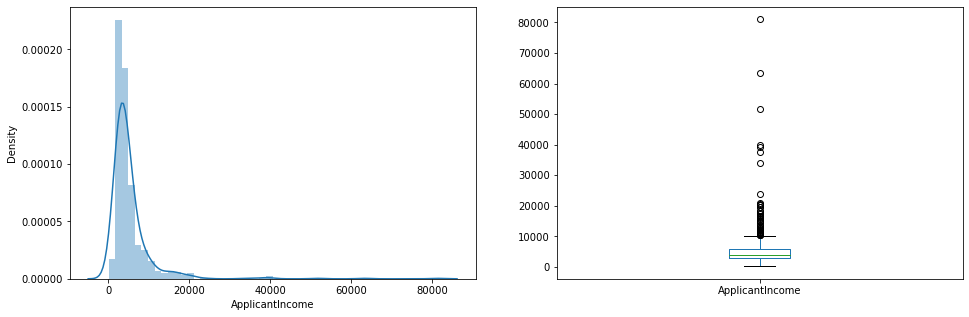

In [15]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize = (16,5))

plt.show()

The above histogram is left skewed and not normally distributed

Text(0.5, 0.98, '')

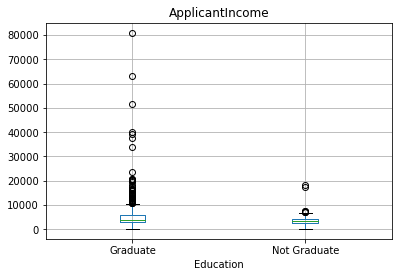

In [16]:
train.boxplot(column='ApplicantIncome',by='Education')
plt.suptitle("")

The above plot shows income disparity in society

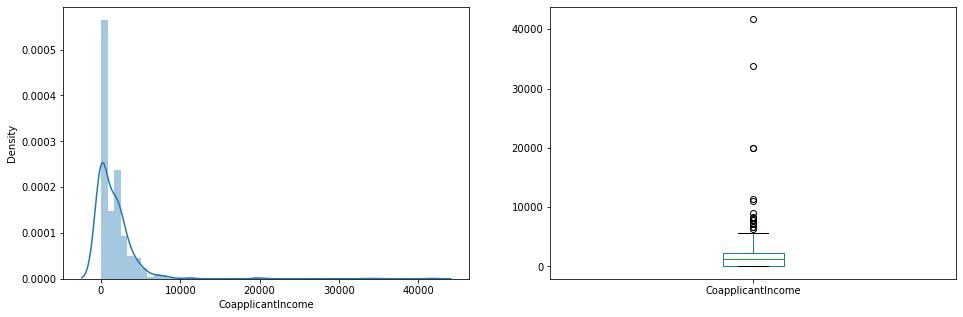

In [17]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize = (16,5))

plt.show()

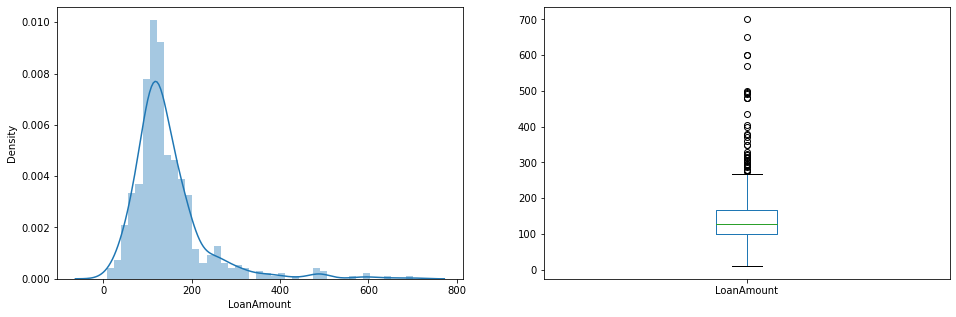

In [18]:
plt.figure(1)

plt.subplot(121)
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize = (16,5))

plt.show()

Bivariate Analysis

          1) Categorical vs target variable

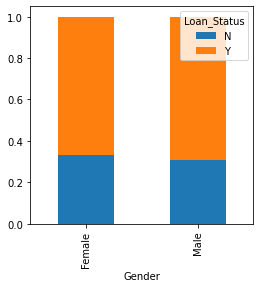

In [19]:
gender = pd.crosstab(train['Gender'],train['Loan_Status'])
gender.div(gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

It can be infered that proportion of male and female applicants for approved and unapproved loans is more or less the same. 

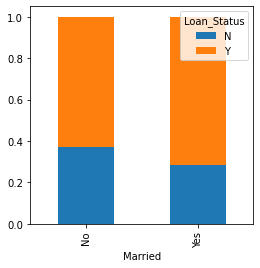

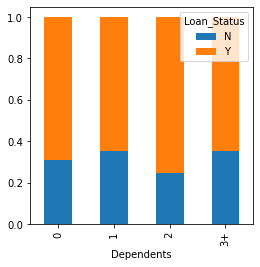

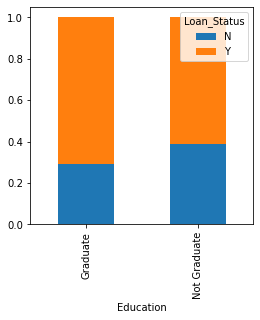

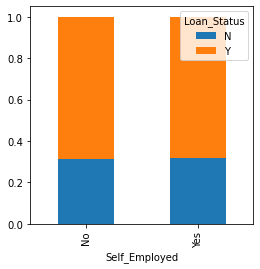

In [20]:
married = pd.crosstab(train['Married'],train['Loan_Status'])
married.div(married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
dependents.div(dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

education = pd.crosstab(train['Education'],train['Loan_Status'])
education.div(education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

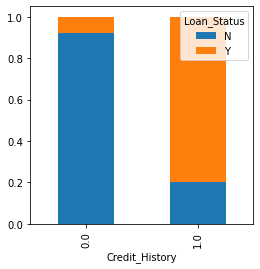

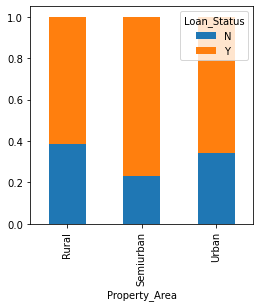

In [21]:
credit_history = pd.crosstab(train['Credit_History'],train['Loan_Status'])
credit_history.div(credit_history.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

Numerical vs target variable

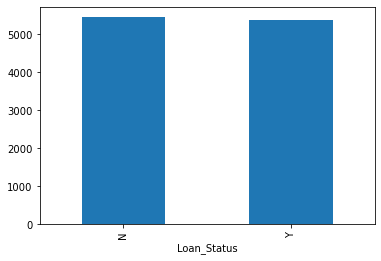

In [22]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Above is the plot showing mean income of people for which loan has been approved vs not approved. Because we don't see any signifcanc edifferenc in the mean income, hence
         1) lets ake bins for applicant variable income

In [23]:
bins = [0,2500,4000,6000,81000]
groups = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=groups)

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


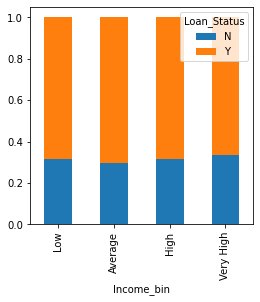

In [24]:
Income_bin= pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

From the above pplot we infer tha applicant income does not affect loan status which contradicts our hypothesis.

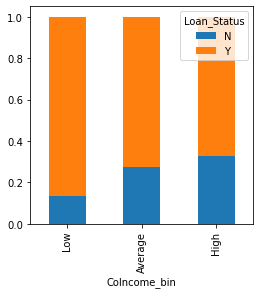

In [25]:
bins = [0,1000,3000,42000]
groups = ['Low','Average','High']
train['CoIncome_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=groups)

CoIncome_bin= pd.crosstab(train['CoIncome_bin'],train['Loan_Status'])
CoIncome_bin.div(CoIncome_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))


We infer that if coApplicant Income is low then chances of loan approval are high! But this does not look right. Some of the applicants may not have a CoApplicant and hence it is 0 and hence approal is not dependent on it. SO mow we will see a combines effect of income and coApplicant Income on loan status.

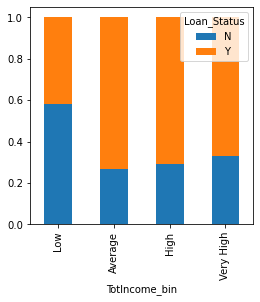

In [26]:
train['totalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

bins = [0,2500,4000,6000,81000]
groups = ['Low','Average','High','Very High']
train['TotIncome_bin'] = pd.cut(train['totalIncome'],bins,labels=groups)
TotIncome_bin= pd.crosstab(train['TotIncome_bin'],train['Loan_Status'])
TotIncome_bin.div(TotIncome_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

those with total income as low have less chance of getting a loan as compared to  others.

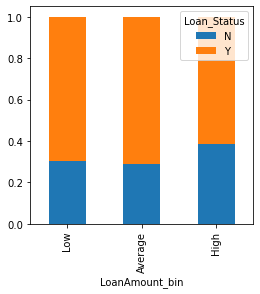

In [27]:
bins = [0,100,200,700]
groups = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=groups)
LoanAmount_bin= pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))

The above plot supports our hypothesis which states that if loan amount is less then loan will be approved.

Remaining tasks:-

                1) convert 3+ to 3
                2) loan status to 0 and 1 so as it is easy to check correlation

In [28]:
train = train.drop(['Income_bin','CoIncome_bin','totalIncome','TotIncome_bin','LoanAmount_bin'], axis=1)

In [29]:
train['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].replace('3+', 3, inplace=True)
train['Loan_Status'].replace('N', 0, inplace=True)
train['Loan_Status'].replace('Y', 1, inplace=True)

Using HeatMap to visualize the correaltion between all numerical variables

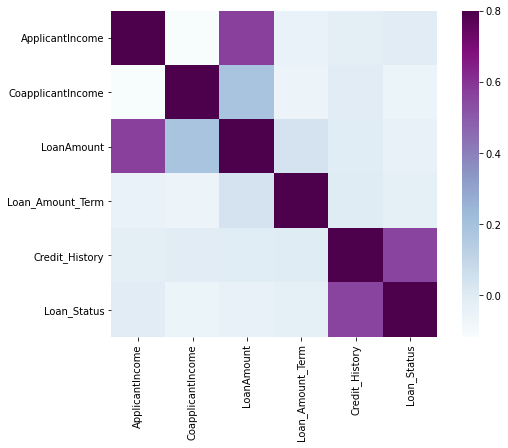

In [30]:
matrix = train.corr()
f, ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

We see that most correlated variables are: 1) ApplicantIncome - LoanAmount  2) CreditHistory-LoanStatus

Missing Value and Outlier Treatment

In [31]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Imputing mode in categorical and mean/median in numerical

In [32]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [33]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Outliers

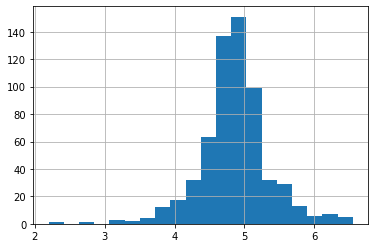

In [34]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

test['LoanAmount_log'] = np.log(test['LoanAmount'])

MODEL BUILDING

In [35]:
from pandas import Series
from sklearn.model_selection import train_test_split

lreg = LinearRegression()

In [36]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


In [37]:
train1 = train.drop(['Loan_ID','Dependents','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','LoanAmount_log','Loan_Status'],axis=1)
dummies = pd.get_dummies(train1)

In [38]:
dummies.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,1,0,1,0,0
2,0,1,0,1,1,0,0,1,0,0,1
3,0,1,0,1,0,1,1,0,0,0,1
4,0,1,1,0,1,0,1,0,0,0,1


In [39]:
train2= train.drop(['Loan_ID','Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','LoanAmount_log'],axis=1)

In [44]:
train2.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,5849,0.0,128.0,360.0,1.0
1,1,4583,1508.0,128.0,360.0,1.0
2,0,3000,0.0,66.0,360.0,1.0
3,0,2583,2358.0,120.0,360.0,1.0
4,0,6000,0.0,141.0,360.0,1.0


In [46]:
df = pd.concat([dummies,train2],axis=1)
df.head()

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0,1,1,0,1,0,1,0,0,0,1,0,5849,0.0,128.0,360.0,1.0
1,0,1,0,1,1,0,1,0,1,0,0,1,4583,1508.0,128.0,360.0,1.0
2,0,1,0,1,1,0,0,1,0,0,1,0,3000,0.0,66.0,360.0,1.0
3,0,1,0,1,0,1,1,0,0,0,1,0,2583,2358.0,120.0,360.0,1.0
4,0,1,1,0,1,0,1,0,0,0,1,0,6000,0.0,141.0,360.0,1.0


In [51]:
df['LoanStatus'] = train.Loan_Status
X_train,X_test,y_train,y_test = train_test_split(df.LoanStatus,df.drop(['LoanStatus'],axis=1),test_size=0.66)

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

model.predict(X_test)

model.score(X_test,y_test)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.